In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Colab\ Notebooks/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks


In [ ]:
# https://github.com/usuyama/pytorch-unet
%matplotlib inline
%load_ext autoreload
%autoreload 2

import time, sys
import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2 as cv
from PIL import Image

# Generate some random images
originalImages = np.zeros((27, 224, 337, 3)).astype(np.uint8)
truthImages = np.zeros((27, 224, 337, 4)).astype(np.uint8)
for i in range(55,82):
    # try:
    temp = cv.imread(f"./Data_Group_Component_Task_1/Test/original_retinal_images/IDRiD_{i:02}.jpg")
    originalImages[i - 55,:,:,:] = cv.resize(temp, (337, 224))
    # except:
    #     print(f"./Data_Group_Component_Task_1/Train/original_retinal_images/IDRiD_{i:02}.jpg ERROR")
# for channel, name in enumerate(['masks_Haemorrhages', 'masks_Hard_Exudates', 'masks_Microaneurysms', 'masks_Soft_Exudates']):
for i in range(55,82):
    try:
        temp = np.array(Image.open(f"./Data_Group_Component_Task_1/Test/masks_Haemorrhages/IDRiD_{i:02}_HE.tif"))
        truthImages[i - 55, :, :, 0] = cv.resize(temp, (337, 224))
    except:
        print(f"skip IDRiD_{i:02}_HE.jpg")
for i in range(55,82):
    try:
        temp = np.array(Image.open(f"./Data_Group_Component_Task_1/Test/masks_Hard_Exudates/IDRiD_{i:02}_EX.tif"))
        truthImages[i - 55, :, :, 1] = cv.resize(temp, (337, 224))
    except:
        print(f"skip IDRiD_{i:02}_EX.jpg")
for i in range(55,82):
    try:
        temp = np.array(Image.open(f"./Data_Group_Component_Task_1/Test/masks_Microaneurysms/IDRiD_{i:02}_MA.tif"))
        truthImages[i - 55, :, :, 2] = cv.resize(temp, (337, 224))
    except:
        print(f"skip IDRiD_{i:02}_MA.jpg")
for i in range(55,82):
    try:
        temp = np.array(Image.open(f"./Data_Group_Component_Task_1/Test/masks_Soft_Exudates/IDRiD_{i:02}_SE.tif"))
        truthImages[i - 55, :, :, 3] = cv.resize(temp, (337, 224))
    except:
        print(f"skip IDRiD_{i:02}_SE.jpg")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
skip IDRiD_57_SE.jpg
skip IDRiD_58_SE.jpg
skip IDRiD_62_SE.jpg
skip IDRiD_63_SE.jpg
skip IDRiD_65_SE.jpg
skip IDRiD_66_SE.jpg
skip IDRiD_69_SE.jpg
skip IDRiD_76_SE.jpg
skip IDRiD_77_SE.jpg
skip IDRiD_78_SE.jpg
skip IDRiD_79_SE.jpg
skip IDRiD_80_SE.jpg
skip IDRiD_81_SE.jpg


In [ ]:
# https://github.com/usuyama/pytorch-unet
%matplotlib inline
%load_ext autoreload
%autoreload 2

import time, sys
import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2 as cv
from PIL import Image

# Generate some random images
originalImages = np.zeros((54, 224, 337, 3)).astype(np.uint8)
truthImages = np.zeros((54, 224, 337, 4)).astype(np.uint8)
for i in range(1, 55):
    # try:
    temp = cv.imread(f"./Data_Group_Component_Task_1/Train/original_retinal_images/IDRiD_{i:02}.jpg")
    originalImages[i - 1,:,:,:] = cv.resize(temp, (337, 224))
    # except:
    #     print(f"./Data_Group_Component_Task_1/Train/original_retinal_images/IDRiD_{i:02}.jpg ERROR")
# for channel, name in enumerate(['masks_Haemorrhages', 'masks_Hard_Exudates', 'masks_Microaneurysms', 'masks_Soft_Exudates']):
for i in range(1, 55):
    try:
        temp = np.array(Image.open(f"./Data_Group_Component_Task_1/Train/masks_Haemorrhages/IDRiD_{i:02}_HE.tif"))
        truthImages[i - 1, :, :, 0] = cv.resize(temp, (337, 224))
    except:
        print(f"skip IDRiD_{i:02}_HE.jpg")
for i in range(1, 55):
    try:
        temp = np.array(Image.open(f"./Data_Group_Component_Task_1/Train/masks_Hard_Exudates/IDRiD_{i:02}_EX.tif"))
        truthImages[i - 1, :, :, 1] = cv.resize(temp, (337, 224))
    except:
        print(f"skip IDRiD_{i:02}_EX.jpg")
for i in range(1, 55):
    try:
        temp = np.array(Image.open(f"./Data_Group_Component_Task_1/Train/masks_Microaneurysms/IDRiD_{i:02}_MA.tif"))
        truthImages[i - 1, :, :, 2] = cv.resize(temp, (337, 224))
    except:
        print(f"skip IDRiD_{i:02}_MA.jpg")
for i in range(1, 55):
    try:
        temp = np.array(Image.open(f"./Data_Group_Component_Task_1/Train/masks_Soft_Exudates/IDRiD_{i:02}_SE.tif"))
        truthImages[i - 1, :, :, 3] = cv.resize(temp, (337, 224))
    except:
        print(f"skip IDRiD_{i:02}_SE.jpg")


(<matplotlib.image.AxesImage at 0x7fb9a15b3940>, (224, 337))

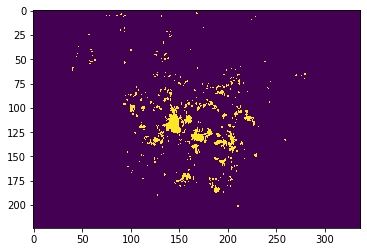

In [ ]:
plt.imshow(truthImages[2,:,:,1]), truthImages[2,:,:,3].shape

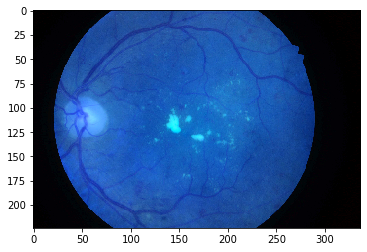

In [ ]:
plt.imshow(originalImages[2,:,:,:])

In [ ]:
# https://www.pyimagesearch.com/2015/10/05/opencv-gamma-correction/
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    maxInt = image.max()
    table = np.array([((i / maxInt) ** invGamma) * maxInt 
                      for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv.LUT(image.astype(np.uint8), table)

# https://stackoverflow.com/questions/25008458/how-to-apply-clahe-on-rgb-color-images
claheImages = np.zeros_like(originalImages).astype(np.float64)
for i in range(54):

    bgr = originalImages[i,:,:,:]

    lab = cv.cvtColor(bgr, cv.COLOR_BGR2LAB)

    lab_planes = cv.split(lab)

    clahe = cv.createCLAHE(clipLimit=2.0,tileGridSize=(5,5))

    lab_planes[0] = adjust_gamma(clahe.apply(lab_planes[0]), 1.5)

    lab = cv.merge(lab_planes)

    claheImages[i,:,:,:] = cv.cvtColor(lab, cv.COLOR_LAB2BGR)

In [ ]:
normImages = np.zeros_like(originalImages).astype(np.float64)
for i in range(54):
    normImages[i,:,:,:] = claheImages[i,:,:,:]/255
truthImagesPre = truthImages
normImagesPre = normImages

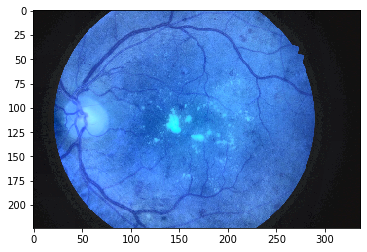

In [ ]:
plt.imshow((normImagesPre[2,:,:,:] * 255).astype(np.uint8))

In [ ]:
normImages = np.transpose(normImagesPre,(0,3,1,2))
truthImages = np.transpose(truthImagesPre,(0,3,1,2))
normImages.shape, truthImages.shape

((54, 3, 224, 337), (54, 4, 224, 337))

In [ ]:
def gen_patches(img, truth, num):
    patchesData = np.zeros((num, 3, 224, 224)) 
    patchesTruth = np.zeros((num, 4, 224, 224))
    range = img.shape[-1] - 224
    hor_range = np.arange(0, range, range//num + 1)
    i = 0
    for y in hor_range:
        patchesData[i,:,:,:] = img[:,:,y:y+224]
        patchesTruth[i,:,:,:] = truth[:,:,y:y+224]
        i += 1
    return patchesData, patchesTruth
def dataShuffle(a,b):
    seed = int(time.time())
    np.random.seed(seed)
    np.random.shuffle(a)
    np.random.seed(seed)
    np.random.shuffle(b)
    return a,b
def augmentation(n):
    pn = 54
    x, y = np.zeros((n*pn,3,224,224)),np.zeros((n*pn,4,224,224))
    for i in range(pn):
        x[i*n:(i+1)*n,:,:,:], y[i*n:(i+1)*n,:,:,:] = gen_patches(normImages[i,:,:,:], truthImages[i,:,:,:], n)
    return x,y
rate = 60
train_x, train_y = dataShuffle(*augmentation(rate))
train_x, train_y = augmentation(rate)
# test, gtruth1 = gen_patches(stImages[0,:,:], groundTruth[0,:,:], 10)

In [ ]:
train_x.shape, train_y.shape

((3240, 3, 224, 224), (3240, 4, 224, 224))

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, models

normTensors = torch.tensor(train_x).float()
truthTensors = torch.tensor(train_y).float()

sp = 3000
train_set = torch.utils.data.TensorDataset(normTensors[:sp,:,:,:], truthTensors[:sp,:,:,:])
val_set = torch.utils.data.TensorDataset(normTensors[sp:,:,:,:], truthTensors[sp:,:,:,:])

image_datasets = {
    'train': train_set, 'val': val_set
}

batch_size = 32

dataloaders = {
    'train': DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0),
    'val': DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=0)
}

dataset_sizes = {
    x: len(image_datasets[x]) for x in image_datasets.keys()
}

dataset_sizes

{'train': 3000, 'val': 240}

torch.Size([32, 3, 224, 224]) torch.Size([32, 4, 224, 224])
0.0 1.0 0.4408094 0.30584386
0.0 1.0 0.0098039275 0.098528296
torch.Size([32, 3, 224, 224])


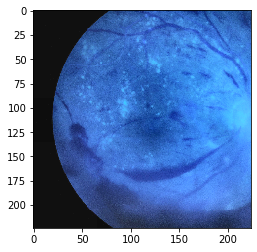

In [ ]:
import torchvision.utils


# Get a batch of training data
inputs, masks = next(iter(dataloaders['train']))

print(inputs.shape, masks.shape)
for x in [inputs.numpy(), masks.numpy()]:
    print(x.min(), x.max(), x.mean(), x.std())
print(inputs.shape)
plt.imshow(inputs[3,:,:,:].permute(1,2,0))

In [ ]:
from torchvision import models

base_model = models.resnet18(pretrained=False)

In [ ]:
# check keras-like model summary using torchsummary
import torch
from torchsummary import summary

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
base_model = base_model.to(device)

summary(base_model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [ ]:
import torch
import torch.nn as nn

def convrelu(in_channels, out_channels, kernel, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel, padding=padding),
        nn.ReLU(inplace=True),
    )

class ResNetUNet(nn.Module):

    def __init__(self, n_class):
        super().__init__()
        
        self.base_model = models.resnet18(pretrained=True)
        
        self.base_layers = list(self.base_model.children())                
        
        self.layer0 = nn.Sequential(*self.base_layers[:3]) # size=(N, 64, x.H/2, x.W/2)
        self.layer0_1x1 = convrelu(64, 64, 1, 0)
        self.layer1 = nn.Sequential(*self.base_layers[3:5]) # size=(N, 64, x.H/4, x.W/4)        
        self.layer1_1x1 = convrelu(64, 64, 1, 0)       
        self.layer2 = self.base_layers[5]  # size=(N, 128, x.H/8, x.W/8)        
        self.layer2_1x1 = convrelu(128, 128, 1, 0)  
        self.layer3 = self.base_layers[6]  # size=(N, 256, x.H/16, x.W/16)        
        self.layer3_1x1 = convrelu(256, 256, 1, 0)  
        self.layer4 = self.base_layers[7]  # size=(N, 512, x.H/32, x.W/32)
        self.layer4_1x1 = convrelu(512, 512, 1, 0)  
        
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        
        self.conv_up3 = convrelu(256 + 512, 512, 3, 1)
        self.dup3 = convrelu(512, 512, 3, 1)
        self.conv_up2 = convrelu(128 + 512, 256, 3, 1)
        self.dup2 = convrelu(256, 256, 3, 1)
        self.conv_up1 = convrelu(64 + 256, 256, 3, 1)
        self.dup1 = convrelu(256, 256, 3, 1)
        self.conv_up0 = convrelu(64 + 256, 128, 3, 1)
        self.dup0 = convrelu(128, 128, 3, 1)
        
        self.conv_original_size0 = convrelu(3, 64, 3, 1)
        self.conv_original_size1 = convrelu(64, 64, 3, 1)
        self.conv_original_size2 = convrelu(64 + 128, 64, 3, 1)
        
        self.conv_last = nn.Conv2d(64, n_class, 1)
        
    def forward(self, input):
        x_original = self.conv_original_size0(input)
        x_original = self.conv_original_size1(x_original)
        
        layer0 = self.layer0(input)            
        layer1 = self.layer1(layer0)
        layer2 = self.layer2(layer1)
        layer3 = self.layer3(layer2)        
        layer4 = self.layer4(layer3)
        
        layer4 = self.layer4_1x1(layer4)
        x = self.upsample(layer4)
        layer3 = self.layer3_1x1(layer3)
        x = torch.cat([x, layer3], dim=1)
        x = self.conv_up3(x)
        x = self.dup3(x)
 
        x = self.upsample(x)
        layer2 = self.layer2_1x1(layer2)
        x = torch.cat([x, layer2], dim=1)
        x = self.conv_up2(x)
        x = self.dup2(x)

        x = self.upsample(x)
        layer1 = self.layer1_1x1(layer1)
        x = torch.cat([x, layer1], dim=1)
        x = self.conv_up1(x)
        x = self.dup1(x)

        x = self.upsample(x)
        layer0 = self.layer0_1x1(layer0)
        x = torch.cat([x, layer0], dim=1)
        x = self.conv_up0(x)
        x = self.dup0(x)
        
        x = self.upsample(x)
        x = torch.cat([x, x_original], dim=1)
        x = self.conv_original_size2(x)        
        
        out = self.conv_last(x)        
        
        return out

In [ ]:
# check keras-like model summary using torchsummary

from torchsummary import summary

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ResNetUNet(4)
model = model.to(device)

summary(model, input_size=(3, 224, 224))

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 82.2MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
            Conv2d-5         [-1, 64, 112, 112]           9,408
            Conv2d-6         [-1, 64, 112, 112]           9,408
       BatchNorm2d-7         [-1, 64, 112, 112]             128
       BatchNorm2d-8         [-1, 64, 112, 112]             128
              ReLU-9         [-1, 64, 112, 112]               0
             ReLU-10         [-1, 64, 112, 112]               0
        MaxPool2d-11           [-1, 64, 56, 56]               0
        MaxPool2d-12           [-1, 64, 56, 56]               0
           Conv2d-13           [-1, 64, 56, 56]          36,864
           Conv2d-14           [-1, 64,

In [ ]:
from collections import defaultdict
import torch.nn.functional as F
import torch


def dice_loss(pred, target, smooth = 1.):
    pred = pred.contiguous()
    target = target.contiguous()    

    intersection = (pred * target).sum(dim=2).sum(dim=2)
    
    loss = (1 - ((2. * intersection + smooth) / (pred.sum(dim=2).sum(dim=2) + target.sum(dim=2).sum(dim=2) + smooth)))
    
    return loss.mean()

def calc_loss(pred, target, metrics, bce_weight=0.5):
    bce = F.binary_cross_entropy_with_logits(pred, target)
        
    pred = torch.sigmoid(pred)
    dice = dice_loss(pred, target)
    
    loss = bce * bce_weight + dice * (1 - bce_weight)
    
    metrics['bce'] += bce.data.cpu().numpy() * target.size(0)
    metrics['dice'] += dice.data.cpu().numpy() * target.size(0)
    metrics['loss'] += loss.data.cpu().numpy() * target.size(0)
    
    return loss

def print_metrics(metrics, epoch_samples, phase):    
    outputs = []
    for k in metrics.keys():
        outputs.append("{}: {:4f}".format(k, metrics[k] / epoch_samples))
        
    print("{}: {}".format(phase, ", ".join(outputs)))    

def train_model(model, optimizer, scheduler, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = 1e10

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        since = time.time()

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            metrics = defaultdict(float)
            epoch_samples = 0
            
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)             

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = calc_loss(outputs, labels, metrics)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                epoch_samples += inputs.size(0)

            print_metrics(metrics, epoch_samples, phase)
            epoch_loss = metrics['loss'] / epoch_samples
            if phase == 'train':
                scheduler.step()
                for param_group in optimizer.param_groups:
                    print("LR", param_group['lr'])
            # deep copy the model
            if phase == 'val' and epoch_loss < best_loss:
                print("saving best model")
                best_loss = epoch_loss
                best_model_wts = copy.deepcopy(model.state_dict())

        time_elapsed = time.time() - since
        print('{:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
            
    print('Best val loss: {:4f}'.format(best_loss))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import copy

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

num_class = 4

model = ResNetUNet(num_class).to(device)

# freeze backbone layers
# Comment out to finetune further
# for l in model.base_layers:
#     for param in l.parameters():
#         param.requires_grad = False

optimizer_ft = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=20, gamma=0.1)        
        
model = train_model(model, optimizer_ft, exp_lr_scheduler, num_epochs=100)

cuda:0
Epoch 0/99
----------
train: bce: 0.125544, dice: 0.830211, loss: 0.477877
LR 0.001
val: bce: 0.083184, dice: 0.903678, loss: 0.493431
saving best model
0m 50s
Epoch 1/99
----------
train: bce: 0.039687, dice: 0.668920, loss: 0.354303
LR 0.001
val: bce: 0.027561, dice: 0.850955, loss: 0.439258
saving best model
0m 50s
Epoch 2/99
----------
train: bce: 0.032999, dice: 0.590688, loss: 0.311844
LR 0.001
val: bce: 0.029939, dice: 0.850124, loss: 0.440031
0m 50s
Epoch 3/99
----------
train: bce: 0.028595, dice: 0.549650, loss: 0.289123
LR 0.001
val: bce: 0.025821, dice: 0.821397, loss: 0.423609
saving best model
0m 50s
Epoch 4/99
----------
train: bce: 0.026156, dice: 0.530476, loss: 0.278316
LR 0.001
val: bce: 0.027605, dice: 0.831485, loss: 0.429545
0m 50s
Epoch 5/99
----------
train: bce: 0.028625, dice: 0.516904, loss: 0.272765
LR 0.001
val: bce: 0.046655, dice: 0.869619, loss: 0.458137
0m 50s
Epoch 6/99
----------
train: bce: 0.023700, dice: 0.465810, loss: 0.244755
LR 0.001
val

In [ ]:
#### prediction

import math

model.eval()   # Set model to evaluate mode

test_dataset = torch.utils.data.TensorDataset(normTensors[sp:,:,:,:], truthTensors[sp:,:,:,:])
test_loader = DataLoader(train_set, batch_size=10, shuffle=False, num_workers=0)

inputs, labels = None, None
for i in range(100):    
    inputs, labels = next(iter(test_loader))
inputs = inputs.to(device)
print('inputs',inputs.shape)
labels = labels.to(device)
print('labels',labels.shape)
pred = model(inputs)
print('pred',pred.shape)
pred = torch.sigmoid(pred)
pred = pred.data.cpu().numpy()
print(pred.shape)

# Change channel-order and make 3 channels for matplot
cinputs = inputs.cpu().permute(0,2,3,1)
clabels = labels.cpu().permute(0,2,3,1)
cpred = pred.transpose(0,2,3,1)
# Map each channel (i.e. class) to each color

inputs torch.Size([10, 3, 224, 224])
labels torch.Size([10, 4, 224, 224])
pred torch.Size([10, 4, 224, 224])
(10, 4, 224, 224)


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe280d97e10>,
 <matplotlib.image.AxesImage at 0x7fe280d57390>)

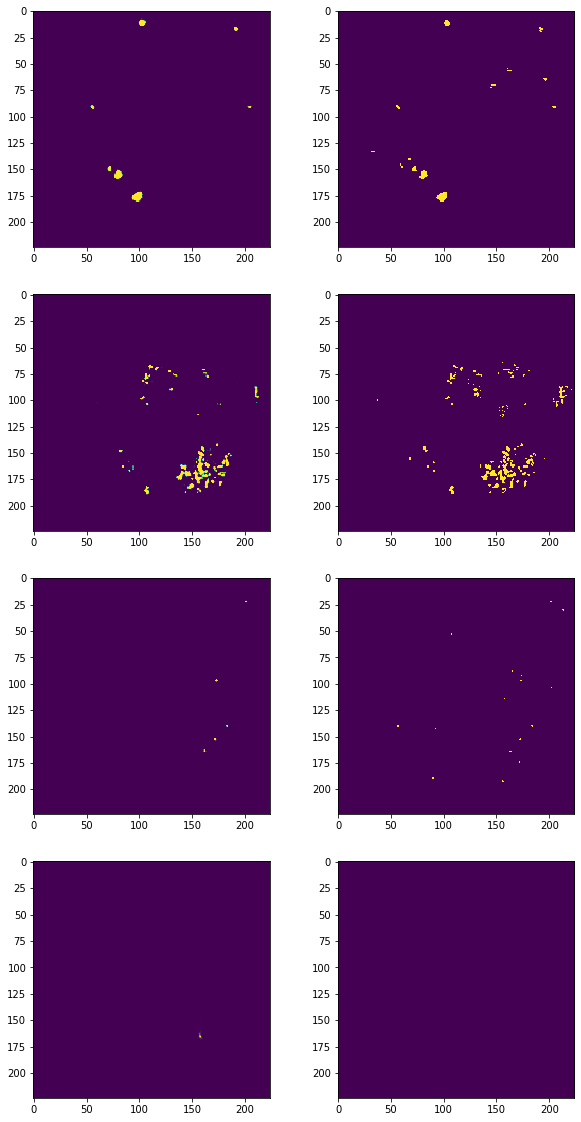

In [ ]:
plt.figure(figsize = (10,20))
i = 5
plt.subplot(421), plt.imshow(cpred[i,:,:,0])
plt.subplot(422), plt.imshow(clabels[i,:,:,0])
plt.subplot(423), plt.imshow(cpred[i,:,:,1])
plt.subplot(424), plt.imshow(clabels[i,:,:,1])
plt.subplot(425), plt.imshow(cpred[i,:,:,2])
plt.subplot(426), plt.imshow(clabels[i,:,:,2])
plt.subplot(427), plt.imshow(cpred[i,:,:,3])
plt.subplot(428), plt.imshow(clabels[i,:,:,3])

In [ ]:
torch.save(model, './t1.pkl')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ResNetUNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ResNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BatchNorm2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.

In [ ]:
model = torch.load("./t1.pkl")

In [ ]:
NI = np.transpose(normImagesPre,(0,3,1,2))
TI = np.transpose(truthImagesPre,(0,3,1,2))
NI.shape, TI.shape

((54, 3, 224, 337), (54, 4, 224, 337))

In [ ]:
evalCanvas = np.zeros((54,4,224,224))

In [ ]:
#### prediction

import math

model.eval()   # Set model to evaluate mode
device = 'cuda:0'

tiTensors = torch.utils.data.TensorDataset(torch.tensor(NI), 
                                           torch.tensor(TI))
testloader = torch.utils.data.DataLoader(tiTensors, batch_size=1, shuffle = False)

idx = 0     
for inputs, labels in testloader:
    inputs = inputs.to(device)
    print('inputs',inputs.shape)
    labels = labels.to(device)
    print('labels',labels.shape)
    # print('**',inputs[:,:,i:i+224, j:j+224].shape)
    pred = model(inputs[:,:,:, 168-112:168+112].float())
    # print('pred',pred.shape)
    pred = torch.sigmoid(pred)
    pred = pred.data.cpu().numpy()
    evalCanvas[idx,:,:, :] = pred[0,:,:,:]/pred[0,:,:,:].max()*255
    # plt.imshow(pred[0,0,:,:]*255)
    # plt.show()
    idx += 1

inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224

In [ ]:
!pwd

/gdrive/My Drive/Colab Notebooks


In [ ]:
for i in range(54):
    for j in range(4):
        # plt.subplot(121), plt.imshow(evalCanvas[i,j,:,:])
        # plt.subplot(122), plt.imshow(truthImagesPre[i,:,:,j][:,168-112:168+112])
        newImage = np.zeros((224,224 * 2))
        l = (evalCanvas[i,j,:,:] - evalCanvas[i,j,:,:].min())/(evalCanvas[i,j,:,:].max() - evalCanvas[i,j,:,:].min())
        r = truthImagesPre[i,:,:,j][:,168-112:168+112]
        newImage = np.concatenate((l * 255, r * 255), axis = 1)
        cv.imwrite(f"/gdrive/My Drive/Colab Notebooks/t1_op/{i + 1}_{j + 1}output.jpg", newImage)

In [ ]:
truthImagesPre.shape

(54, 224, 337, 4)

In [ ]:
# https://www.pyimagesearch.com/2015/10/05/opencv-gamma-correction/
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    maxInt = image.max()
    table = np.array([((i / maxInt) ** invGamma) * maxInt 
                      for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv.LUT(image.astype(np.uint8), table)

# https://stackoverflow.com/questions/25008458/how-to-apply-clahe-on-rgb-color-images
claheImages = np.zeros_like(originalImages).astype(np.float64)
for i in range(27):

    bgr = originalImages[i,:,:,:]

    lab = cv.cvtColor(bgr, cv.COLOR_BGR2LAB)

    lab_planes = cv.split(lab)

    clahe = cv.createCLAHE(clipLimit=2.0,tileGridSize=(5,5))

    lab_planes[0] = adjust_gamma(clahe.apply(lab_planes[0]), 1.5)

    lab = cv.merge(lab_planes)

    claheImages[i,:,:,:] = cv.cvtColor(lab, cv.COLOR_LAB2BGR)

In [ ]:
normImages = np.zeros_like(originalImages).astype(np.float64)
for i in range(27):
    normImages[i,:,:,:] = claheImages[i,:,:,:]/255
truthImagesPre = truthImages
normImagesPre = normImages

In [ ]:
normImages = np.transpose(normImagesPre,(0,3,1,2))
truthImages = np.transpose(truthImagesPre,(0,3,1,2))
normImages.shape, truthImages.shape

((27, 3, 224, 337), (27, 4, 224, 337))

In [ ]:
def gen_patches(img, truth, num):
    patchesData = np.zeros((num, 3, 224, 224)) 
    patchesTruth = np.zeros((num, 4, 224, 224))
    range = img.shape[-1] - 224
    hor_range = np.arange(0, range, range//num + 1)
    i = 0
    for y in hor_range:
        patchesData[i,:,:,:] = img[:,:,y:y+224]
        patchesTruth[i,:,:,:] = truth[:,:,y:y+224]
        i += 1
    return patchesData, patchesTruth
def dataShuffle(a,b):
    seed = int(time.time())
    np.random.seed(seed)
    np.random.shuffle(a)
    np.random.seed(seed)
    np.random.shuffle(b)
    return a,b
def augmentation(n):
    pn = 27
    x, y = np.zeros((n*pn,3,224,224)),np.zeros((n*pn,4,224,224))
    for i in range(pn):
        x[i*n:(i+1)*n,:,:,:], y[i*n:(i+1)*n,:,:,:] = gen_patches(normImages[i,:,:,:], truthImages[i,:,:,:], n)
    return x,y
rate = 60
train_x, train_y = dataShuffle(*augmentation(rate))
train_x, train_y = augmentation(rate)
# test, gtruth1 = gen_patches(stImages[0,:,:], groundTruth[0,:,:], 10)

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, models

normTensors = torch.tensor(train_x).float()
truthTensors = torch.tensor(train_y).float()

sp = 1500
train_set = torch.utils.data.TensorDataset(normTensors[:sp,:,:,:], truthTensors[:sp,:,:,:])
val_set = torch.utils.data.TensorDataset(normTensors[sp:,:,:,:], truthTensors[sp:,:,:,:])

image_datasets = {
    'train': train_set, 'val': val_set
}

batch_size = 32

dataloaders = {
    'train': DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0),
    'val': DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=0)
}

dataset_sizes = {
    x: len(image_datasets[x]) for x in image_datasets.keys()
}

dataset_sizes

{'train': 1500, 'val': 120}

In [ ]:
from torchvision import models

base_model = models.resnet18(pretrained=False)

In [ ]:
import torch
import torch.nn as nn

def convrelu(in_channels, out_channels, kernel, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel, padding=padding),
        nn.ReLU(inplace=True),
    )

class ResNetUNet(nn.Module):

    def __init__(self, n_class):
        super().__init__()
        
        self.base_model = models.resnet18(pretrained=True)
        
        self.base_layers = list(self.base_model.children())                
        
        self.layer0 = nn.Sequential(*self.base_layers[:3]) # size=(N, 64, x.H/2, x.W/2)
        self.layer0_1x1 = convrelu(64, 64, 1, 0)
        self.layer1 = nn.Sequential(*self.base_layers[3:5]) # size=(N, 64, x.H/4, x.W/4)        
        self.layer1_1x1 = convrelu(64, 64, 1, 0)       
        self.layer2 = self.base_layers[5]  # size=(N, 128, x.H/8, x.W/8)        
        self.layer2_1x1 = convrelu(128, 128, 1, 0)  
        self.layer3 = self.base_layers[6]  # size=(N, 256, x.H/16, x.W/16)        
        self.layer3_1x1 = convrelu(256, 256, 1, 0)  
        self.layer4 = self.base_layers[7]  # size=(N, 512, x.H/32, x.W/32)
        self.layer4_1x1 = convrelu(512, 512, 1, 0)  
        
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        
        self.conv_up3 = convrelu(256 + 512, 512, 3, 1)
        self.dup3 = convrelu(512, 512, 3, 1)
        self.conv_up2 = convrelu(128 + 512, 256, 3, 1)
        self.dup2 = convrelu(256, 256, 3, 1)
        self.conv_up1 = convrelu(64 + 256, 256, 3, 1)
        self.dup1 = convrelu(256, 256, 3, 1)
        self.conv_up0 = convrelu(64 + 256, 128, 3, 1)
        self.dup0 = convrelu(128, 128, 3, 1)
        
        self.conv_original_size0 = convrelu(3, 64, 3, 1)
        self.conv_original_size1 = convrelu(64, 64, 3, 1)
        self.conv_original_size2 = convrelu(64 + 128, 64, 3, 1)
        
        self.conv_last = nn.Conv2d(64, n_class, 1)
        
    def forward(self, input):
        x_original = self.conv_original_size0(input)
        x_original = self.conv_original_size1(x_original)
        
        layer0 = self.layer0(input)            
        layer1 = self.layer1(layer0)
        layer2 = self.layer2(layer1)
        layer3 = self.layer3(layer2)        
        layer4 = self.layer4(layer3)
        
        layer4 = self.layer4_1x1(layer4)
        x = self.upsample(layer4)
        layer3 = self.layer3_1x1(layer3)
        x = torch.cat([x, layer3], dim=1)
        x = self.conv_up3(x)
        x = self.dup3(x)
 
        x = self.upsample(x)
        layer2 = self.layer2_1x1(layer2)
        x = torch.cat([x, layer2], dim=1)
        x = self.conv_up2(x)
        x = self.dup2(x)

        x = self.upsample(x)
        layer1 = self.layer1_1x1(layer1)
        x = torch.cat([x, layer1], dim=1)
        x = self.conv_up1(x)
        x = self.dup1(x)

        x = self.upsample(x)
        layer0 = self.layer0_1x1(layer0)
        x = torch.cat([x, layer0], dim=1)
        x = self.conv_up0(x)
        x = self.dup0(x)
        
        x = self.upsample(x)
        x = torch.cat([x, x_original], dim=1)
        x = self.conv_original_size2(x)        
        
        out = self.conv_last(x)        
        
        return out

In [ ]:
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import copy

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

num_class = 4

model = ResNetUNet(num_class).to(device)

# freeze backbone layers
# Comment out to finetune further
# for l in model.base_layers:
#     for param in l.parameters():
#         param.requires_grad = False

optimizer_ft = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=20, gamma=0.1)        
        
model = train_model(model, optimizer_ft, exp_lr_scheduler, num_epochs=100)

cuda:0
Epoch 0/99
----------
train: bce: 0.179927, dice: 0.870671, loss: 0.525299
LR 0.001
val: bce: 0.028619, dice: 0.678096, loss: 0.353358
saving best model
0m 25s
Epoch 1/99
----------
train: bce: 0.046940, dice: 0.771776, loss: 0.409358
LR 0.001
val: bce: 0.032590, dice: 0.612954, loss: 0.322772
saving best model
0m 25s
Epoch 2/99
----------
train: bce: 0.043163, dice: 0.684981, loss: 0.364072
LR 0.001
val: bce: 0.025111, dice: 0.572270, loss: 0.298690
saving best model
0m 25s
Epoch 3/99
----------
train: bce: 0.038098, dice: 0.617369, loss: 0.327733
LR 0.001
val: bce: 0.023873, dice: 0.526910, loss: 0.275391
saving best model
0m 25s
Epoch 4/99
----------
train: bce: 0.034268, dice: 0.588525, loss: 0.311396
LR 0.001
val: bce: 0.023871, dice: 0.524520, loss: 0.274195
saving best model
0m 25s
Epoch 5/99
----------
train: bce: 0.032180, dice: 0.571430, loss: 0.301805
LR 0.001
val: bce: 0.022247, dice: 0.501289, loss: 0.261768
saving best model
0m 25s
Epoch 6/99
----------
train: bce:

In [ ]:
torch.save(model, './t1x.pkl')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ResNetUNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ResNet. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BatchNorm2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.

In [ ]:
NI = np.transpose(normImagesPre,(0,3,1,2))
TI = np.transpose(truthImagesPre,(0,3,1,2))
NI.shape, TI.shape

((27, 3, 224, 337), (27, 4, 224, 337))

In [ ]:
evalCanvas = np.zeros((27,4,224,224))

In [ ]:
#### prediction

import math

model.eval()   # Set model to evaluate mode
device = 'cuda:0'

tiTensors = torch.utils.data.TensorDataset(torch.tensor(NI), 
                                           torch.tensor(TI))
testloader = torch.utils.data.DataLoader(tiTensors, batch_size=1, shuffle = False)

idx = 0     
for inputs, labels in testloader:
    inputs = inputs.to(device)
    print('inputs',inputs.shape)
    labels = labels.to(device)
    print('labels',labels.shape)
    # print('**',inputs[:,:,i:i+224, j:j+224].shape)
    pred = model(inputs[:,:,:, 168-112:168+112].float())
    # print('pred',pred.shape)
    pred = torch.sigmoid(pred)
    pred = pred.data.cpu().numpy()
    evalCanvas[idx,:,:, :] = pred[0,:,:,:]/pred[0,:,:,:].max()*255
    # plt.imshow(pred[0,0,:,:]*255)
    # plt.show()
    idx += 1

inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224, 337])
inputs torch.Size([1, 3, 224, 337])
labels torch.Size([1, 4, 224

In [ ]:
for i in range(27):
    for j in range(4):
        # plt.subplot(121), plt.imshow(evalCanvas[i,j,:,:])
        # plt.subplot(122), plt.imshow(truthImagesPre[i,:,:,j][:,168-112:168+112])
        newImage = np.zeros((224,224 * 2))
        l = (evalCanvas[i,j,:,:] - evalCanvas[i,j,:,:].min())/(evalCanvas[i,j,:,:].max() - evalCanvas[i,j,:,:].min())
        r = truthImagesPre[i,:,:,j][:,168-112:168+112]
        newImage = np.concatenate((l * 255, r * 255), axis = 1)
        print(cv.imwrite(f"/gdrive/My Drive/Colab Notebooks/t1x_op/{i + 1}_{j + 1}output.jpg", newImage))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [ ]:
evalCanvas.max()
truthImagesPre[0,:,:,0][:,168-112:168+112].max()

1

In [ ]:
# 0: recall 1: accuracy 2: precision 3: f1-score
metrics = np.zeros((27,4,4))

for i in range(27):
    for j in range(4):
        tp = ((evalCanvas[i,j,:,:] > 125)* (truthImagesPre[i,:,:,j][:,168-112:168+112] == 1)).sum()
        tn = ((evalCanvas[i,j,:,:] <= 125)* (truthImagesPre[i,:,:,j][:,168-112:168+112] == 0)).sum()
        fp = ((evalCanvas[i,j,:,:] > 125)* (truthImagesPre[i,:,:,j][:,168-112:168+112] == 0)).sum()
        fn = ((evalCanvas[i,j,:,:] <= 125)* (truthImagesPre[i,:,:,j][:,168-112:168+112] == 1)).sum()
        if tp:
            metrics[i, j, 0] = tp/(tp + fn)
            metrics[i, j, 1] = tp/(tp + fp)
            metrics[i, j, 2] = (tp + tn)/(tp + tn + fp + fn)
            metrics[i, j, 3] = 2 * metrics[i, j, 0] * metrics[i, j, 1]/(metrics[i, j, 0] + metrics[i, j, 1])


In [ ]:
metrics[:,0,:] # HE

array([[0.85055644, 0.88283828, 0.99671158, 0.86639676],
       [0.78216123, 0.88286544, 0.99252631, 0.82946794],
       [0.        , 0.        , 0.        , 0.        ],
       [0.80039526, 0.87662338, 0.99685108, 0.83677686],
       [0.74090909, 0.87399464, 0.99679129, 0.80196802],
       [0.74895397, 0.79910714, 0.99790737, 0.77321814],
       [0.83378378, 0.87201633, 0.96169483, 0.8524716 ],
       [0.59090909, 0.79591837, 0.9992626 , 0.67826087],
       [0.79710145, 0.87301587, 0.99956154, 0.83333333],
       [0.65333333, 0.88288288, 0.99870456, 0.75095785],
       [0.64039409, 0.83333333, 0.99802695, 0.72423398],
       [0.83116883, 0.88888889, 0.99916295, 0.8590604 ],
       [0.83292018, 0.88888889, 0.98909837, 0.85999488],
       [0.80228758, 0.80294358, 0.99037388, 0.80261545],
       [0.76655629, 0.80662021, 0.98493304, 0.7860781 ],
       [0.88651316, 0.88505747, 0.99722975, 0.88578472],
       [0.7827476 , 0.83333333, 0.99766821, 0.80724876],
       [0.59183673, 0.74358974,

In [ ]:
metrics[:,1,:] # EX

array([[0.78351185, 0.8196944 , 0.97612404, 0.80119482],
       [0.60759494, 0.76190476, 0.99908323, 0.67605634],
       [0.49528302, 0.73426573, 0.99711017, 0.5915493 ],
       [0.7523511 , 0.74074074, 0.99675143, 0.74650078],
       [0.72661871, 0.82113821, 0.99521684, 0.77099237],
       [0.58536585, 0.78504673, 0.99671158, 0.67065868],
       [0.75621891, 0.76      , 0.9980668 , 0.75810474],
       [0.79259259, 0.7896679 , 0.99774793, 0.79112754],
       [0.79509632, 0.82545455, 0.99575494, 0.80999108],
       [0.68932039, 0.77808219, 0.99583466, 0.73101673],
       [0.73411765, 0.7839196 , 0.99603396, 0.7582017 ],
       [0.87181303, 0.85754093, 0.96926818, 0.86461809],
       [0.70157068, 0.85350318, 0.99840561, 0.77011494],
       [0.83760684, 0.875     , 0.99934232, 0.8558952 ],
       [0.71629213, 0.74344023, 0.99623326, 0.72961373],
       [0.87628866, 0.85642317, 0.99790737, 0.86624204],
       [0.73130699, 0.79563492, 0.98503268, 0.76211593],
       [0.7544596 , 0.8549346 ,

In [ ]:
metrics[:,2,:] # MA

array([[0.44285714, 0.88571429, 0.99914302, 0.59047619],
       [0.31884058, 0.81481481, 0.99896365, 0.45833333],
       [0.        , 0.        , 0.        , 0.        ],
       [0.38095238, 0.57142857, 0.99924267, 0.45714286],
       [0.37096774, 0.74193548, 0.9990633 , 0.49462366],
       [0.29032258, 0.64285714, 0.99892379, 0.4       ],
       [0.44444444, 0.78571429, 0.9986647 , 0.56774194],
       [0.        , 0.        , 0.        , 0.        ],
       [0.92307692, 0.85714286, 0.99994021, 0.88888889],
       [0.16666667, 0.34375   , 0.99848533, 0.2244898 ],
       [0.41237113, 0.8       , 0.9986647 , 0.54421769],
       [0.21052632, 0.92307692, 0.99908323, 0.34285714],
       [0.44871795, 0.81395349, 0.99898358, 0.5785124 ],
       [0.54545455, 0.92307692, 0.99956154, 0.68571429],
       [0.31034483, 0.66666667, 0.99902344, 0.42352941],
       [0.36585366, 0.83333333, 0.99942203, 0.50847458],
       [0.26785714, 0.625     , 0.99800702, 0.375     ],
       [0.17647059, 0.81818182,

In [ ]:
metrics[:,3,:] # SE

array([[0.        , 0.        , 0.        , 0.        ],
       [0.90555556, 0.91316527, 0.99870456, 0.90934449],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.94562212, 0.94562212, 0.99764828, 0.94562212],
       [0.81947262, 0.91818182, 0.99750877, 0.86602358],
       [0.99056604, 0.97222222, 0.99992028, 0.98130841],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.9516129 , 0.90421456, 0.9992626 , 0.92730845],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.92307692, 0.91566265, 0.99920281, 0.91935484],
       [0.96437055, 0.90625   , 0.998864  , 0.93440736],
       [0.        , 0.        , 0.        , 0.        ],
       [0.97037037, 0.94927536, 0.99978077, 0.95970696],
       [0.97297297, 0.93103448, 0.99978077, 0.95154185],
       [0.97979798, 0.95098039,

In [ ]:
for i in range(20):
    newImage = np.zeros((672,672 * 2))
    l = (evalCanvas[i,:,:] - evalCanvas[i,:,:].min())/(evalCanvas[i,:,:].max() - evalCanvas[i,:,:].min())
    r = padTestTruth[i,:,:]
    newImage = np.concatenate((l * 255, r * 255), axis = 1)
    cv.imwrite(f"/gdrive/My Drive/Colab Notebooks/retina-unet-master/task2_final_result/{i + 1}output.jpg", newImage)